Hello! I am Floris.

https://www.florisvanvugt.com/

In [ ]:
# The bureaucratics
%pylab inline
#import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from ipywidgets import interactive
from IPython.display import Audio, display
from IPython.display import Image
from IPython.display import display, clear_output
from IPython.core.display import HTML 
import scipy.io.wavfile
import scipy.signal

Also you will need sound files (see Github repo)

# 1. Creating a simple sound wave

Q: What is sound?

Q: What are properties of sounds?

Let's make a simple sound wave, a pure sound at 440 Hz.

In [8]:
f = 440
t = linspace(0,1,44100)
signal = np.sin(2*pi*f*t)

In [ ]:
display(Audio(data=signal, rate=44100))

In [ ]:
signal[:100]

Those are called **samples**, and the rate at which they occur is the **sampling rate** (taux d'échantillonnage).

Sampling rate typically is expressed in Hz, which is number/second.

A sampling rate of 44100 means 44100 samples per second. We also often write 44.1 kHz.

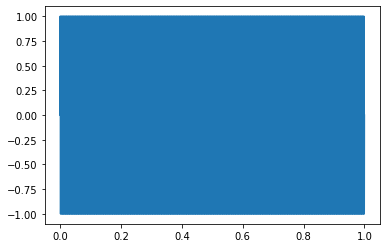

In [5]:
plot(t,signal)

(0, 0.01)

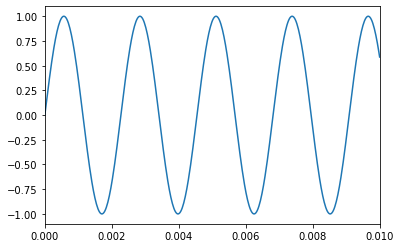

In [6]:
plot(t,signal)
xlim(0,.01)

(0, 0.001)

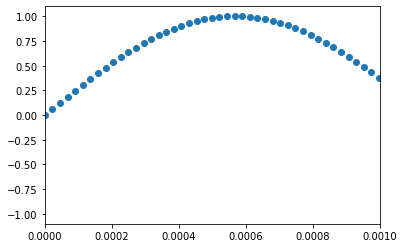

In [7]:
plot(t,signal,'o')
xlim(0,.001)
# so we see the samples!

Q: What will happen if we multiply the signal by .5?

**Amplitude** can be thought of as the difference between the maximum and the minimum value of the signal.

The greater the amplitude, the louder the sound.

Q: What determines the pitch of a sound?

**Frequency** of a sound is the number of cycles per unit of time.

For example, the number of "waves" during 1 second. Expressed in Hz again.

There is a formula:
    
$$\textrm{signal}=\sin(2\pi*f*t)$$

Where $t$ is time, and $f$ is the frequency (in periods per time).

In [9]:
f = 440
SR = 44100
t = linspace(0,1,SR)
signal = np.sin(2*pi*f*t)
display(Audio(data=signal, rate=SR))

## Output to WAVE file

scipy.io.wavfile.write(filename, rate, data)

Don't you just love the internet? https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

In [10]:
scipy.io.wavfile.write('a440.wav',SR,signal)

In [11]:
rt,dt = scipy.io.wavfile.read('a440.wav')

In [12]:
rt

44100

In [13]:
dt

array([ 0.00000000e+00,  6.26497429e-02,  1.25053344e-01, ...,
       -1.25053344e-01, -6.26497429e-02,  6.27613383e-14])

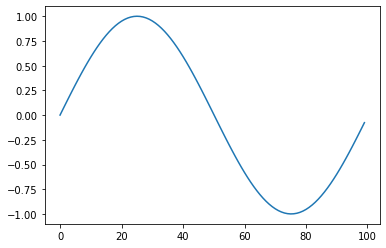

In [14]:
plot(dt[:100])

# 2. Basic sound editing issues

## 2.1 Fading

Did this annoy you too?

In [15]:
f = 342.1
SR = 44100
t = linspace(0,1,SR)
signal = np.sin(2*pi*f*t)
display(Audio(data=signal, rate=SR))

In [ ]:
plot(signal[:300])

What a cliffhanger!!

Q: What can we do about it?

Fading!

In [ ]:
plot(signal)

Let's fade in the entire sound first (easier).

In [ ]:
fader = linspace(0,1,SR)

In [ ]:
plot(fader)

In [ ]:
newsignal = fader*signal
display(Audio(data=newsignal, rate=SR))

In [ ]:
plot(newsignal)

**EXERCISE** Can you instead fade out the sound?

Now let's say we want to fade in, then plateau, and then fade out.

In [ ]:
n_samples_fade = int(.1*SR)
n_samples_plateau = int(.8*SR)

In [ ]:
fade_in  = linspace(0,1,n_samples_fade)
plateau  = ones(n_samples_plateau)
fade_out = linspace(1,0,n_samples_fade)

envelope = concatenate([fade_in,plateau,fade_out])

In [ ]:
plot(envelope)

In [ ]:
newsignal = envelope*signal
display(Audio(data=newsignal, rate=SR))

In [ ]:
plot(newsignal)

**EXERCISE** Can you make the fade take longer, i.e. 200ms instead of 100ms?

## 2.2 Volume normalization

Sound source: freesound.org

In [ ]:
def play_nonorm(data,rate):
    # I'll tell you later what these two commands are doing here:
    dat = array(data) # ensure editable
    dat[-1]=32767    # disable normalization
    display(Audio(data=dat, rate=rate))

In [ ]:
rt,sneeze = scipy.io.wavfile.read('sneeze.wav')
play_nonorm(sneeze,rt)

In [ ]:
rt,whisper = scipy.io.wavfile.read('whisper.wav')
play_nonorm(whisper,rt)

In [ ]:
plot(sneeze)

In [ ]:
sneeze.shape # that many samples

**EXERCISE** Can you create a time vector to go with the signal? You know the signal sampling rate, you know how many samples...

In [ ]:
sz = sneeze.shape[0]
t = arange(0,sneeze.shape[0])/rt # create a corresponding time vector
plot(t,sneeze)

Ok, let's plot them together. What do you expect to see?

In [ ]:
t = arange(0,sneeze.shape[0])/rt # create a corresponding time vector
plot(t,sneeze)
t2 = arange(0,whisper.shape[0])/rt # create a corresponding time vector
plot(t2,whisper)

Q: How can we make the volume more similar?

In [ ]:
play_nonorm(5*whisper,rt)

Ok, but can we be a bit more systematic about it?

### 2.2.1 Peak normalization

One way: take the maximum and make it the same across both sounds.

**EXERCISE** Can you rescale the amplitude of the sneeze so that its maximum is 30000? (yes that's an arbitrary number)

In [ ]:
sneezenorm = 30000*(sneeze/max(sneeze))

In [ ]:
plot(sneezenorm)

In [ ]:
play_nonorm(sneezenorm,rt)

In [ ]:
whispernorm = 30000*(whisper/max(whisper))

In [ ]:
play_nonorm(whispernorm,rt)

Q: What is the limitation of using peak normalization?

### 2.2.2 RMS normalization

The idea: take the square, then take the mean, then take the root of the signal. You should get one value.

RMS square -> mean -> root

mathematically: root(mean(square(x)))

Toy example: [2,1,0,1,2] 
What is the RMS?

squares: 4,1,0,1,4, mean = 10/5=2, sqrt = sqrt(2)~1.41

In [ ]:
x = array([2,1,0,1,2])

In [ ]:
sqrt(mean(x**2))

Now with real sounds...

In [ ]:
sneeze = array(sneeze,dtype=float32) # don't worry about why this is necessary

In [ ]:
sneeze**2

In [ ]:
power(sneeze,2)

In [ ]:
mean(power(sneeze,2))

In [ ]:
sqrt(mean(power(sneeze,2)))

In [ ]:
whisper = array(whisper,dtype=float32) # don't worry about why this is necessary

In [ ]:
sqrt(mean(power(whisper,2))) # what do you expect about the value that you'll get?

In [ ]:
sneeze_rms = sneeze/ sqrt(mean(power(sneeze,2)))

In [ ]:
whisper_rms = whisper/ sqrt(mean(power(whisper,2)))

In [ ]:
plot(sneeze_rms)
plot(whisper_rms)

In [ ]:
play_nonorm(whisper_rms,rt)

Q: WTF?

Ah right, we normalized both sounds to a really really weak volume!

In [ ]:
play_nonorm(30000*whisper_rms,rt)

In [ ]:
play_nonorm(30000*sneeze_rms,rt)

# 3 Sounds coming together

In [ ]:
# play_nonorm(15000*(whisper_rms+sneeze_rms),rt)

## 3.1 Musical chords

In [ ]:
SR = 44100
f1 = 440
f2 = 660
t = linspace(0,1,SR)
signal = np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)
display(Audio(data=signal, rate=SR))

In [ ]:
plot(t,signal); xlim(0,.05)

In [ ]:
duration = 3
def two_frequencies(f1=220.0, f2=224.0):
    t = np.linspace(0,duration,SR*duration)
    signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
    display(Audio(data=signal, rate=SR))
    return signal

v = interactive(two_frequencies, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)

## 3.2 Musical sequences

What if we want to present sounds one after another?

In [ ]:
f1 = 440
f2 = 660
t = linspace(0,1,SR)
sound1 = np.sin(2*pi*f1*t)
sound2 = np.sin(2*pi*f2*t)
signal = concatenate([sound1,sound2])
display(Audio(data=signal, rate=SR))

This can also be done in a loop

In [ ]:
sounds = []
t = linspace(0,1,SR)
for f in [440,550,660,880,660,550,440]:
    sound = np.sin(2*pi*f*t)
    sounds.append(sound)

In [ ]:
sounds

In [ ]:
signal = concatenate(sounds)
display(Audio(data=signal, rate=SR))

**EXERCISE**: can you allow as part of the loop to have sounds of different durations as well?

In [ ]:
sounds = []
for f,dur,sil in [
    (264,.250,.5),
    (264,.250,.25),
    (297,1,.25),
    (264,1,.25),
    (352,1,.25),
    (330,2,.5)]:
    t = linspace(0,dur,int(dur*SR))
    sound = np.sin(2*pi*f*t)
    sounds.append(sound)
    sounds.append(zeros(int(sil*SR)))
signal = concatenate(sounds)
display(Audio(data=signal, rate=SR))

## 3.3 Forever rising...

Can we have sounds that go on rising?

First step: create all octaves (= doubling of frequencies)

In [ ]:
t = linspace(0,1,SR)
sounds = zeros(1*SR)
for f in [110, 220, 440, 880, 1760, 3520, 7040, 14080, 28160, 56320, 112640]:
    sound = np.sin(2*pi*f*t)
    sounds += sound

In [ ]:
display(Audio(data=sounds, rate=SR))

Typical hearing of humans is from 20 Hz to 20 kHz.

In [ ]:
f = 20
f*(2**arange(11)) # roughly the frequencies we need

In [ ]:
basef = 20
t = linspace(0,1,SR)
sounds = zeros(1*SR)
for f in basef*(2**arange(11)):
    sound = np.sin(2*pi*f*t)
    sounds += sound
display(Audio(data=sounds, rate=SR))

**EXERCISE** Wrap that in a function that takes base frequency as argument.

In [ ]:
def alloctaves(basef,dur=1):
    t = linspace(0,dur,int(dur*SR))
    sounds = zeros(int(dur*SR))
    for f in basef*(2**arange(11)):
        sound = np.sin(2*pi*f*t)
        sounds += sound
    return sounds

In [ ]:
display(Audio(data=alloctaves(23), rate=SR)) 

In [ ]:
def dispoct(f):
    display(Audio(data=alloctaves(f), rate=SR)) 
v = interactive(dispoct, f=(20,40))
display(v)

**EXERCISE** Can you make a sequence of three shepard tones with base frequencies 20, 21 and 22 Hz?

In [ ]:
sounds = []
for f in range(20,40,1):
    sound = alloctaves(f,.25)
    sounds.append(sound)
    sounds.append(zeros(int(.05*SR)))
signal = concatenate(sounds)
signal = concatenate([signal,signal,signal,signal])
display(Audio(data=signal, rate=SR))

Welcome to Shepard tones! https://en.wikipedia.org/wiki/Shepard_tone

# 4. Frequency analysis

In [ ]:
sound = alloctaves(20,1)

In [ ]:
plot(sound)

How can we find what frequencies were part of this sound?

That's where Fourier analysis comes in.

Fourier Transform allows us to write any signal as a combination of pure sine waves. So it's doing the inverse of what we've been doing so far, namely combining pure sound waves into more complex sounds.

The human ear also does something similar.

In [ ]:
Image(url= "https://4d6619e6-a-62cb3a1a-s-sites.googlegroups.com/site/jayanthinyswebsite/workshops/different%20aspects%20of%20organ%20of%20Corti.png")

There is a bunch of detail in terms of math that is not too important here. What is important is the idea that you have a signal, and then it splits it into the various frequencies.

In [ ]:
fourierTransform = np.fft.fft(sound)/len(sound)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(sound)/2))] # Exclude sampling frequency
tpCount     = len(sound)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/SR
frequencies = values/timePeriod

In [ ]:
plot(frequencies, abs(fourierTransform))
xlim(0,200)

We can get the amplitude too!

In [ ]:
f1 = 440
f2 = 660
t = linspace(0,1,SR)
sound = np.sin(2*pi*f1*t)+.5*np.sin(2*pi*f2*t)

In [ ]:
fourierTransform = np.fft.fft(sound)/len(sound)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(sound)/2))] # Exclude sampling frequency
tpCount     = len(sound)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/SR
frequencies = values/timePeriod
plot(frequencies, abs(fourierTransform))
xlim(400,800)

In [ ]:
Image(url= "https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png")

In [ ]:
sounds = []
for f in [440,550,660,880,660,550,440]:
    sound = np.sin(2*pi*f*t)
    sounds.append(sound)
data = concatenate(sounds)
#signal = concatenate([signal])
display(Audio(data=data, rate=SR))

specgram(data,Fs=SR) 
ylabel('Frequency [Hz]')
xlabel('Time [sec]')
ylim(0,2500)

In [ ]:
rt,data = scipy.io.wavfile.read('youare.wav') # source https://www.101soundboards.com
display(Audio(data=data, rate=rt))
specgram(data,Fs=rt) 
ylabel('Frequency [Hz]')
xlabel('Time [sec]')
ylim(0,15000)

# 5. Simple experiment: mapping positions to sounds

van Vugt & Ostry "audiomotor" paradigm.

http://www.psych.mcgill.ca/labs/mcl/pdf/jocn_a_01204.pdf

In [16]:
Image(url="https://pbs.twimg.com/media/EHFzGNGXkAEzcv2.jpg")

In [20]:
# A simplified mapping between position and sound:
def angle2sound(angle):
    # Angle in degrees, between 0 and 180 degrees
    f1 = 400+2*angle
    f2 = 1600-2*angle
    sound = np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)
    return sound

In [21]:
display(Audio(data=angle2sound(0),rate=SR))

## Creating an interface

Buttons, sliders

In [22]:
button_next = ipywidgets.Button(description="Choose next target")
response = ipywidgets.IntSlider(value=90,min=0,max=180,step=1,
                                description='What angle do you think corresponds to that sound?')
button_respond = ipywidgets.Button(description="Select response")
display(button_next,response,button_respond)

Button(description='Choose next target', style=ButtonStyle())

IntSlider(value=90, description='What angle do you think corresponds to that sound?', max=180)

Button(description='Select response', style=ButtonStyle())

In [23]:
record = {}
record["target_angle"] = 180*random.random()

def select_target(e):
    snd = angle2sound(record["target_angle"])
    clear_output()
    display(ipywidgets.Label(value="This is your target sound:"))
    display(Audio(data=snd,rate=SR))
    # add buttons for responding
    display(response)
    display(button_respond)

In [24]:
button_next.on_click(select_target)
display(button_next)

Label(value='This is your target sound:')

IntSlider(value=67, description='What angle do you think corresponds to that sound?', max=180)

Button(description='Select response', style=ButtonStyle())

In [25]:
def register_response(e):
    val = response.value
    # Give the feedback sound
    snd = angle2sound(val)
    clear_output()
    display(ipywidgets.Label(value="This is your feedback sound for an angle of "+str(val)))
    display(Audio(data=snd,rate=SR))
    display(button_next)

In [26]:
button_respond.on_click(register_response)
display(button_next)

Label(value='This is your target sound:')

IntSlider(value=119, description='What angle do you think corresponds to that sound?', max=180)

Button(description='Select response', style=ButtonStyle())

But so far we don't keep a record of the subject's performance..

In [ ]:
record = {'trials':[]}
record["target_angle"] = 180*random.random()

def register_response(e):
    val = response.value
    record["trials"].append({'target_angle':record["target_angle"],
                            'response_angle':val})
    # Give the feedback sound
    snd = angle2sound(val)
    clear_output()
    display(ipywidgets.Label(value="This is your feedback sound for an angle of "+str(val)))
    display(Audio(data=snd,rate=SR))
    display(button_next)
    
button_respond.on_click(register_response)
display(button_next)

In [ ]:
record["trials"]

In [ ]:
trials = record['trials']
for trial in trials:
    trial['error']=trial['target_angle']-trial['response_angle']

In [ ]:
errors = [ trial['error'] for trial in trials ]
plot(errors)